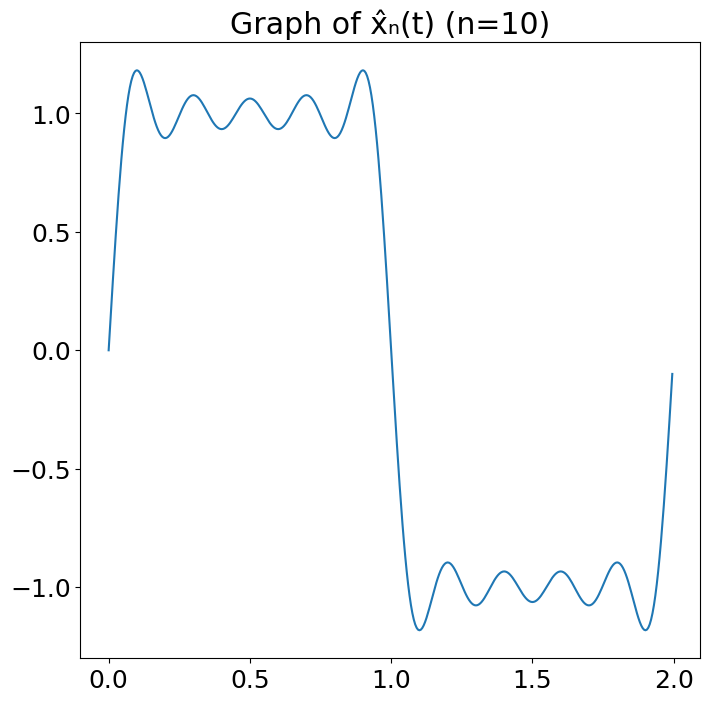

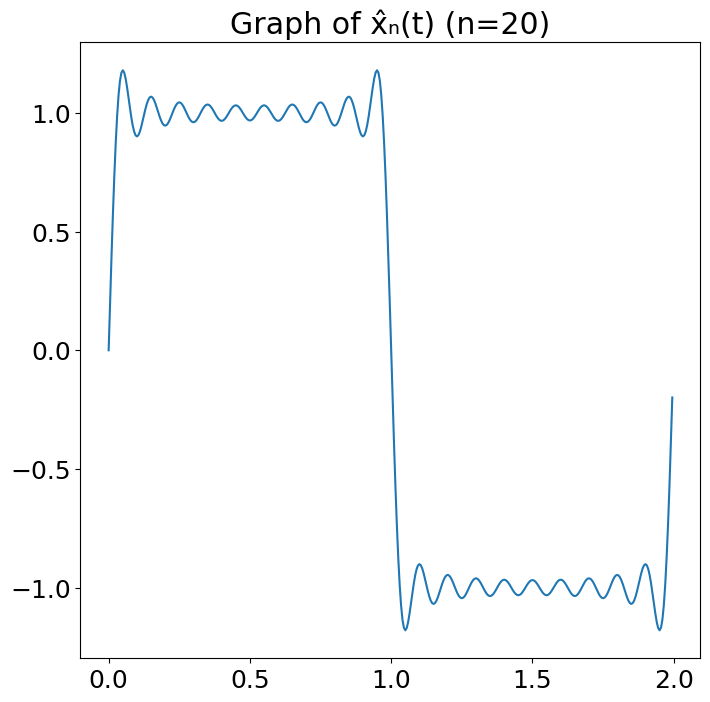

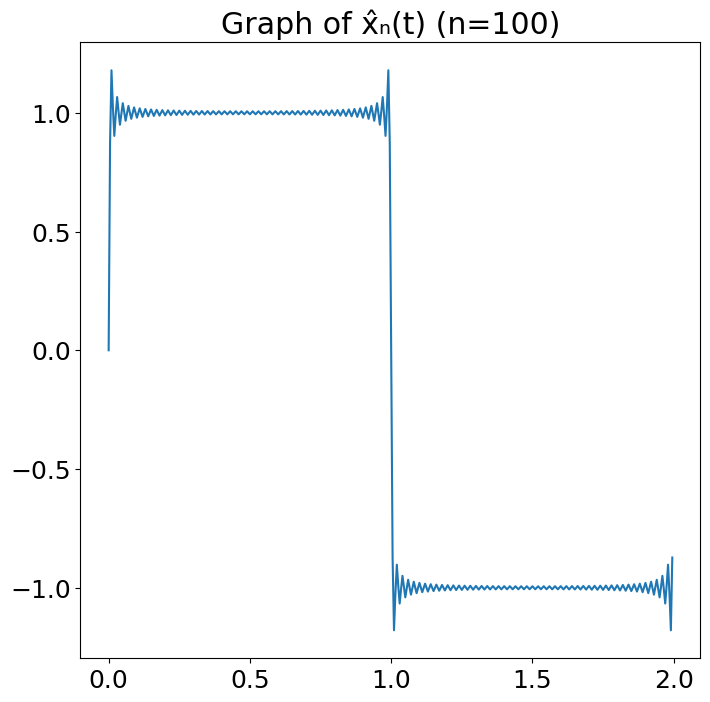

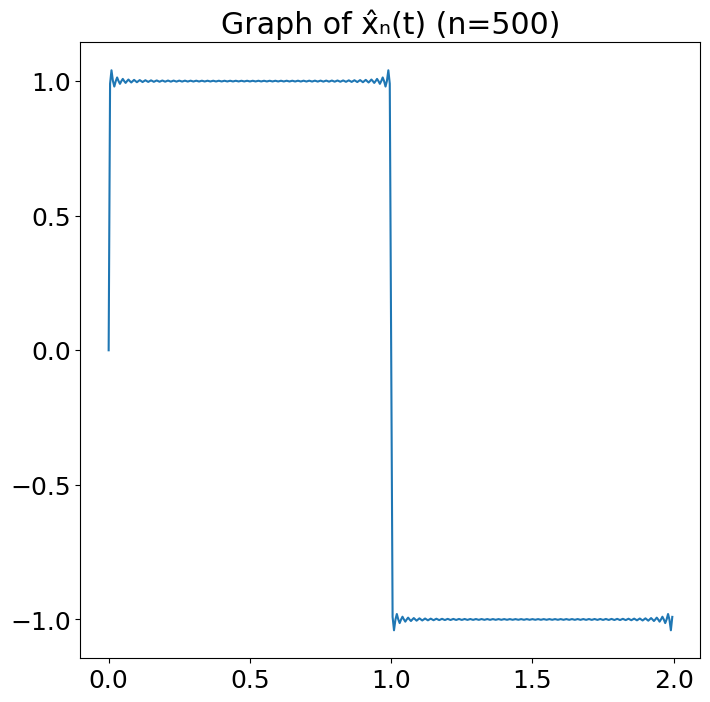

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.005
t = np.arange(0, 2, dt)

def periodic(t, xn, N):
    for n in range (1,int(N+1)):
        if n%2==1:
          xn = xn + 4/pi*(1/n)*np.sin(n*pi*t)

    return xn

N_list = [10, 20, 100, 500]

for N in N_list:
    xn = periodic(t, 0, N)
    plt.title(f"Graph of x̂ₙ(t) (n={N})")
    plt.plot(t, xn)
    plt.savefig(f'1-{N}.png', dpi=300)
    plt.show()

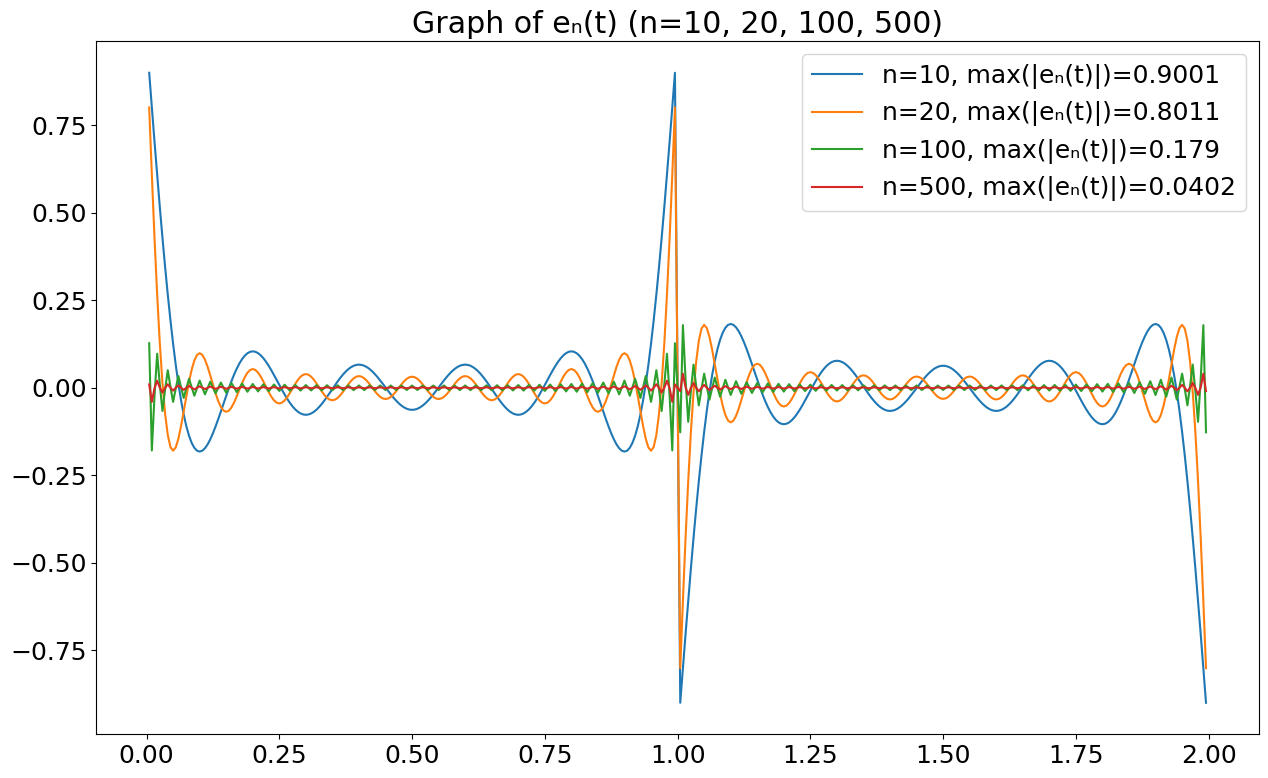

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.005
t1 = np.arange(0+dt, 1, dt)
t2 = np.arange(1+dt, 2, dt)
all_t = np.append(t1, t2[:-1])

def periodic(t, xn, N):
    for n in range (1,int(N+1)):
        if n%2==1:
          xn = xn +4/pi*(1/n)*np.sin(n*pi*t)
    return xn

N_list = [10, 20, 100, 500]
xn_dict = {}
error_dict = {}

for N in N_list:
    error = []

    xn1 = periodic(t1, 0, N)
    for x in xn1:
        error.append(abs(1-x))

    xn2 = periodic(t2, 0, N)
    for x in xn2:
        error.append(abs(-1-x))

    tmp1 = 1-xn1
    tmp2 = -1-xn2[:-1]
    xn_dict[N] = np.append(tmp1, tmp2)
    error_dict[N] = error

plt.figure(figsize=(15, 9))
plt.title(f"Graph of eₙ(t) (n={', '.join([str(N) for N in N_list])})")
for N in N_list:
    plt.plot(all_t, xn_dict[N], label=f"n={N}, max(|eₙ(t)|)={round(max(error_dict[N][:-1]),4)}")
plt.legend(loc = "upper right")
plt.savefig(f'2.png', dpi=500)
plt.show()